In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=25
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=5
T_Arc=0.1
T_passivation = 0.1
T_backmirror = 0.75
dpml = 1.0
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(dpml)]
resolution = 200
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
geometry = [mp.Block(
                     size = mp.Vector3(sx-2*dpml, sy-2*dpml, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.00100708 s
Working in 2D dimensions.
Computational cell is 25 x 10 x 0 with resolution 200
     block, center = (0,0,0)
          size (23,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 98.7108% done, 0.0522436 s remaining
subpixel-averaging is 99.3228% done, 0.0272741 s remaining
subpixel-averaging is 98.6157% done, 0.0561568 s remaining
time for set_epsilon = 14.5089 s
-----------


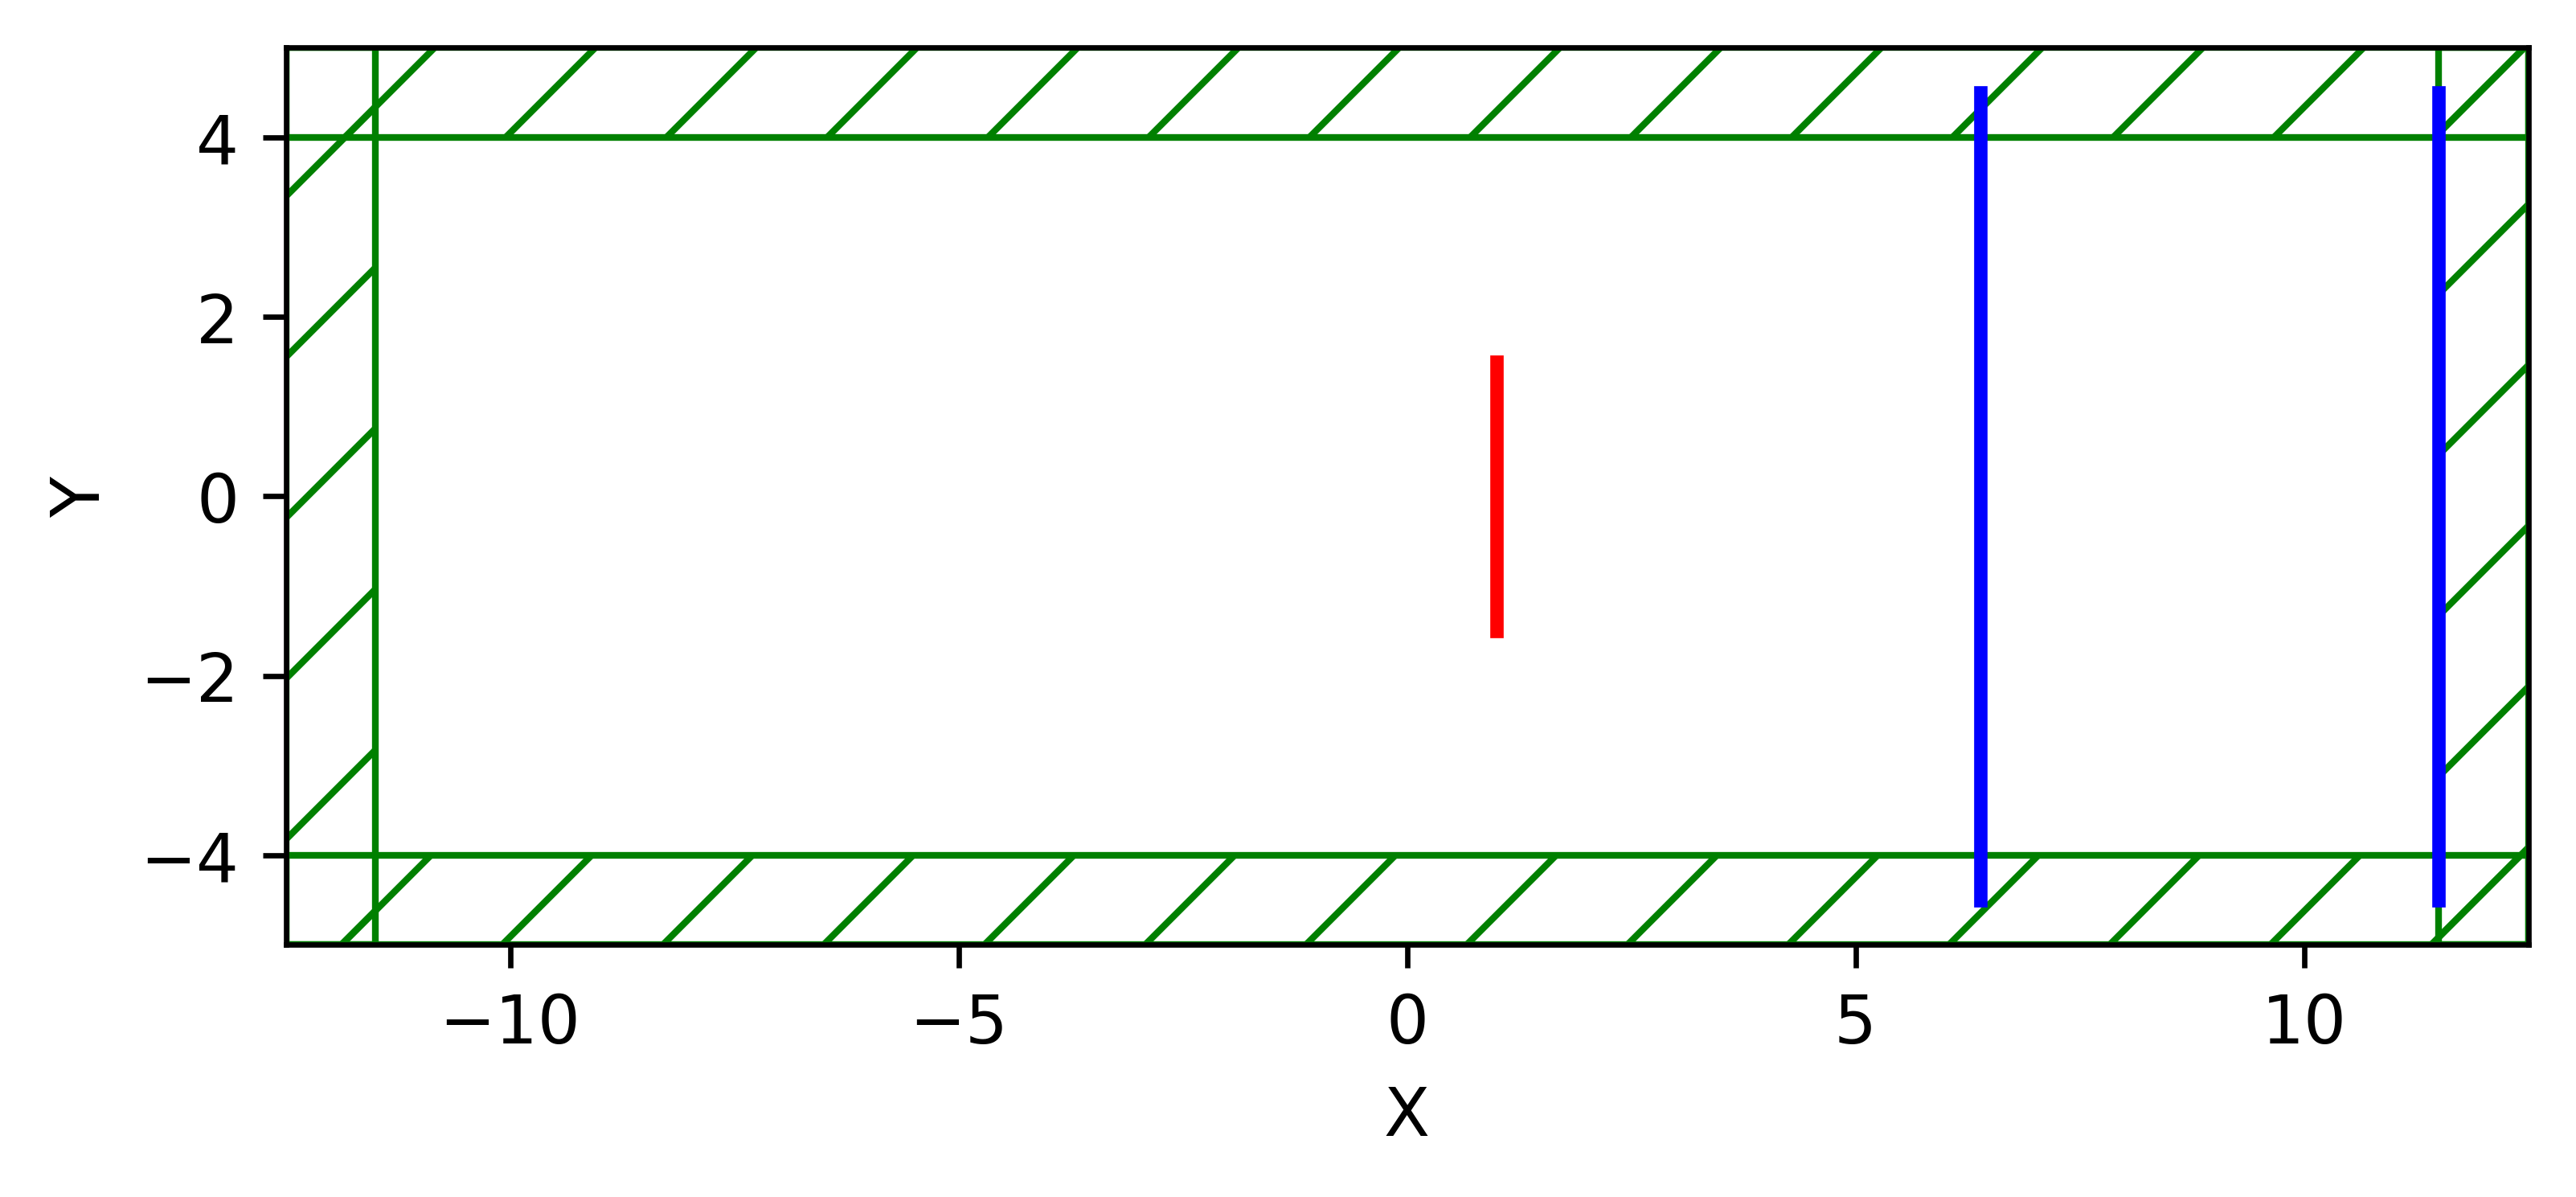

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy-dpml)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml, 0), 
                          size=mp.Vector3(0, sy-dpml)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-dpml-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 46 (time=0.115), 0.0883556 s/step
on time step 100 (time=0.25), 0.0753207 s/step
on time step 154 (time=0.385), 0.0751151 s/step
on time step 208 (time=0.52), 0.0750309 s/step
on time step 262 (time=0.655), 0.0752574 s/step
on time step 316 (time=0.79), 0.0752791 s/step
on time step 370 (time=0.925), 0.0750554 s/step
on time step 424 (time=1.06), 0.0751916 s/step
on time step 478 (time=1.195), 0.0748376 s/step
on time step 532 (time=1.33), 0.0749567 s/step
on time step 585 (time=1.4625), 0.0756483 s/step
on time step 638 (time=1.595), 0.0756932 s/step
on time step 691 (time=1.7275), 0.0759575 s/step
on time step 744 (time=1.86), 0.0764358 s/step
on time step 797 (time=1.9925), 0.0767165 s/step
on time step 850 (time=2.125), 0.0764801 s/step
on time step 903 (time=2.2575), 0.0764029 s/step
on time step 956 (time=2.39), 0.0765582 s/step
on time step 1008 (time=2.52), 0.0770341 s/step
on time step 1060 (time=2.65), 0.0777146 s/step

on time step 8331 (time=20.8275), 0.0756585 s/step
on time step 8384 (time=20.96), 0.0757006 s/step
on time step 8437 (time=21.0925), 0.0755385 s/step
on time step 8490 (time=21.225), 0.0759814 s/step
on time step 8543 (time=21.3575), 0.0766878 s/step
on time step 8596 (time=21.49), 0.0755776 s/step
on time step 8650 (time=21.625), 0.0754388 s/step
on time step 8704 (time=21.76), 0.0754588 s/step
on time step 8758 (time=21.895), 0.0753819 s/step
on time step 8812 (time=22.03), 0.0754139 s/step
on time step 8866 (time=22.165), 0.0754375 s/step
on time step 8919 (time=22.2975), 0.0754931 s/step
on time step 8973 (time=22.4325), 0.0754226 s/step
on time step 9027 (time=22.5675), 0.0754176 s/step
on time step 9081 (time=22.7025), 0.0754496 s/step
on time step 9134 (time=22.835), 0.0755951 s/step
on time step 9187 (time=22.9675), 0.0755119 s/step
on time step 9240 (time=23.1), 0.0755231 s/step
on time step 9293 (time=23.2325), 0.075576 s/step
on time step 9347 (time=23.3675), 0.0754585 s/st

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.61831143e-06, 2.73200069e-06, 2.85038729e-06, 2.97365461e-06,
       3.10199275e-06, 3.23559872e-06, 3.37467669e-06, 3.51943823e-06,
       3.67010254e-06, 3.82689674e-06, 3.99005607e-06, 4.15982422e-06,
       4.33645358e-06, 4.52020554e-06, 4.71135076e-06, 4.91016948e-06,
       5.11695187e-06, 5.33199830e-06, 5.55561971e-06, 5.78813791e-06,
       6.02988597e-06, 6.28120857e-06, 6.54246236e-06, 6.81401632e-06,
       7.09625220e-06, 7.38956488e-06, 7.69436281e-06, 8.01106841e-06,
       8.34011851e-06, 8.68196479e-06, 9.03707428e-06, 9.40592975e-06,
       9.78903029e-06, 1.01868917e-05, 1.06000471e-05, 1.10290475e-05,
       1.14744620e-05, 1.19368788e-05, 1.24169055e-05, 1.29151699e-05,
       1.34323201e-05, 1.39690257e-05, 1.45259782e-05, 1.51038915e-05,
       1.57035029e-05, 1.63255734e-05, 1.69708887e-05, 1.76402596e-05,
       1.83345231e-05, 1.90545429e-05, 1.98012102e-05, 2.05754446e-05,
       2.13781947e-05, 2.22104391e-05, 2.30731872e-05, 2.39674800e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00130987 s
Working in 2D dimensions.
Computational cell is 25 x 10 x 0 with resolution 200
     block, center = (9,0,0)
          size (5,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 10.2573 s
lorentzian susceptibility: frequency=1.73, gamma=5
lorentzian susceptibility: frequency=2.76, gamma=0.126
lorentzian susceptibility: frequency=3.64, gamma=0
-----------


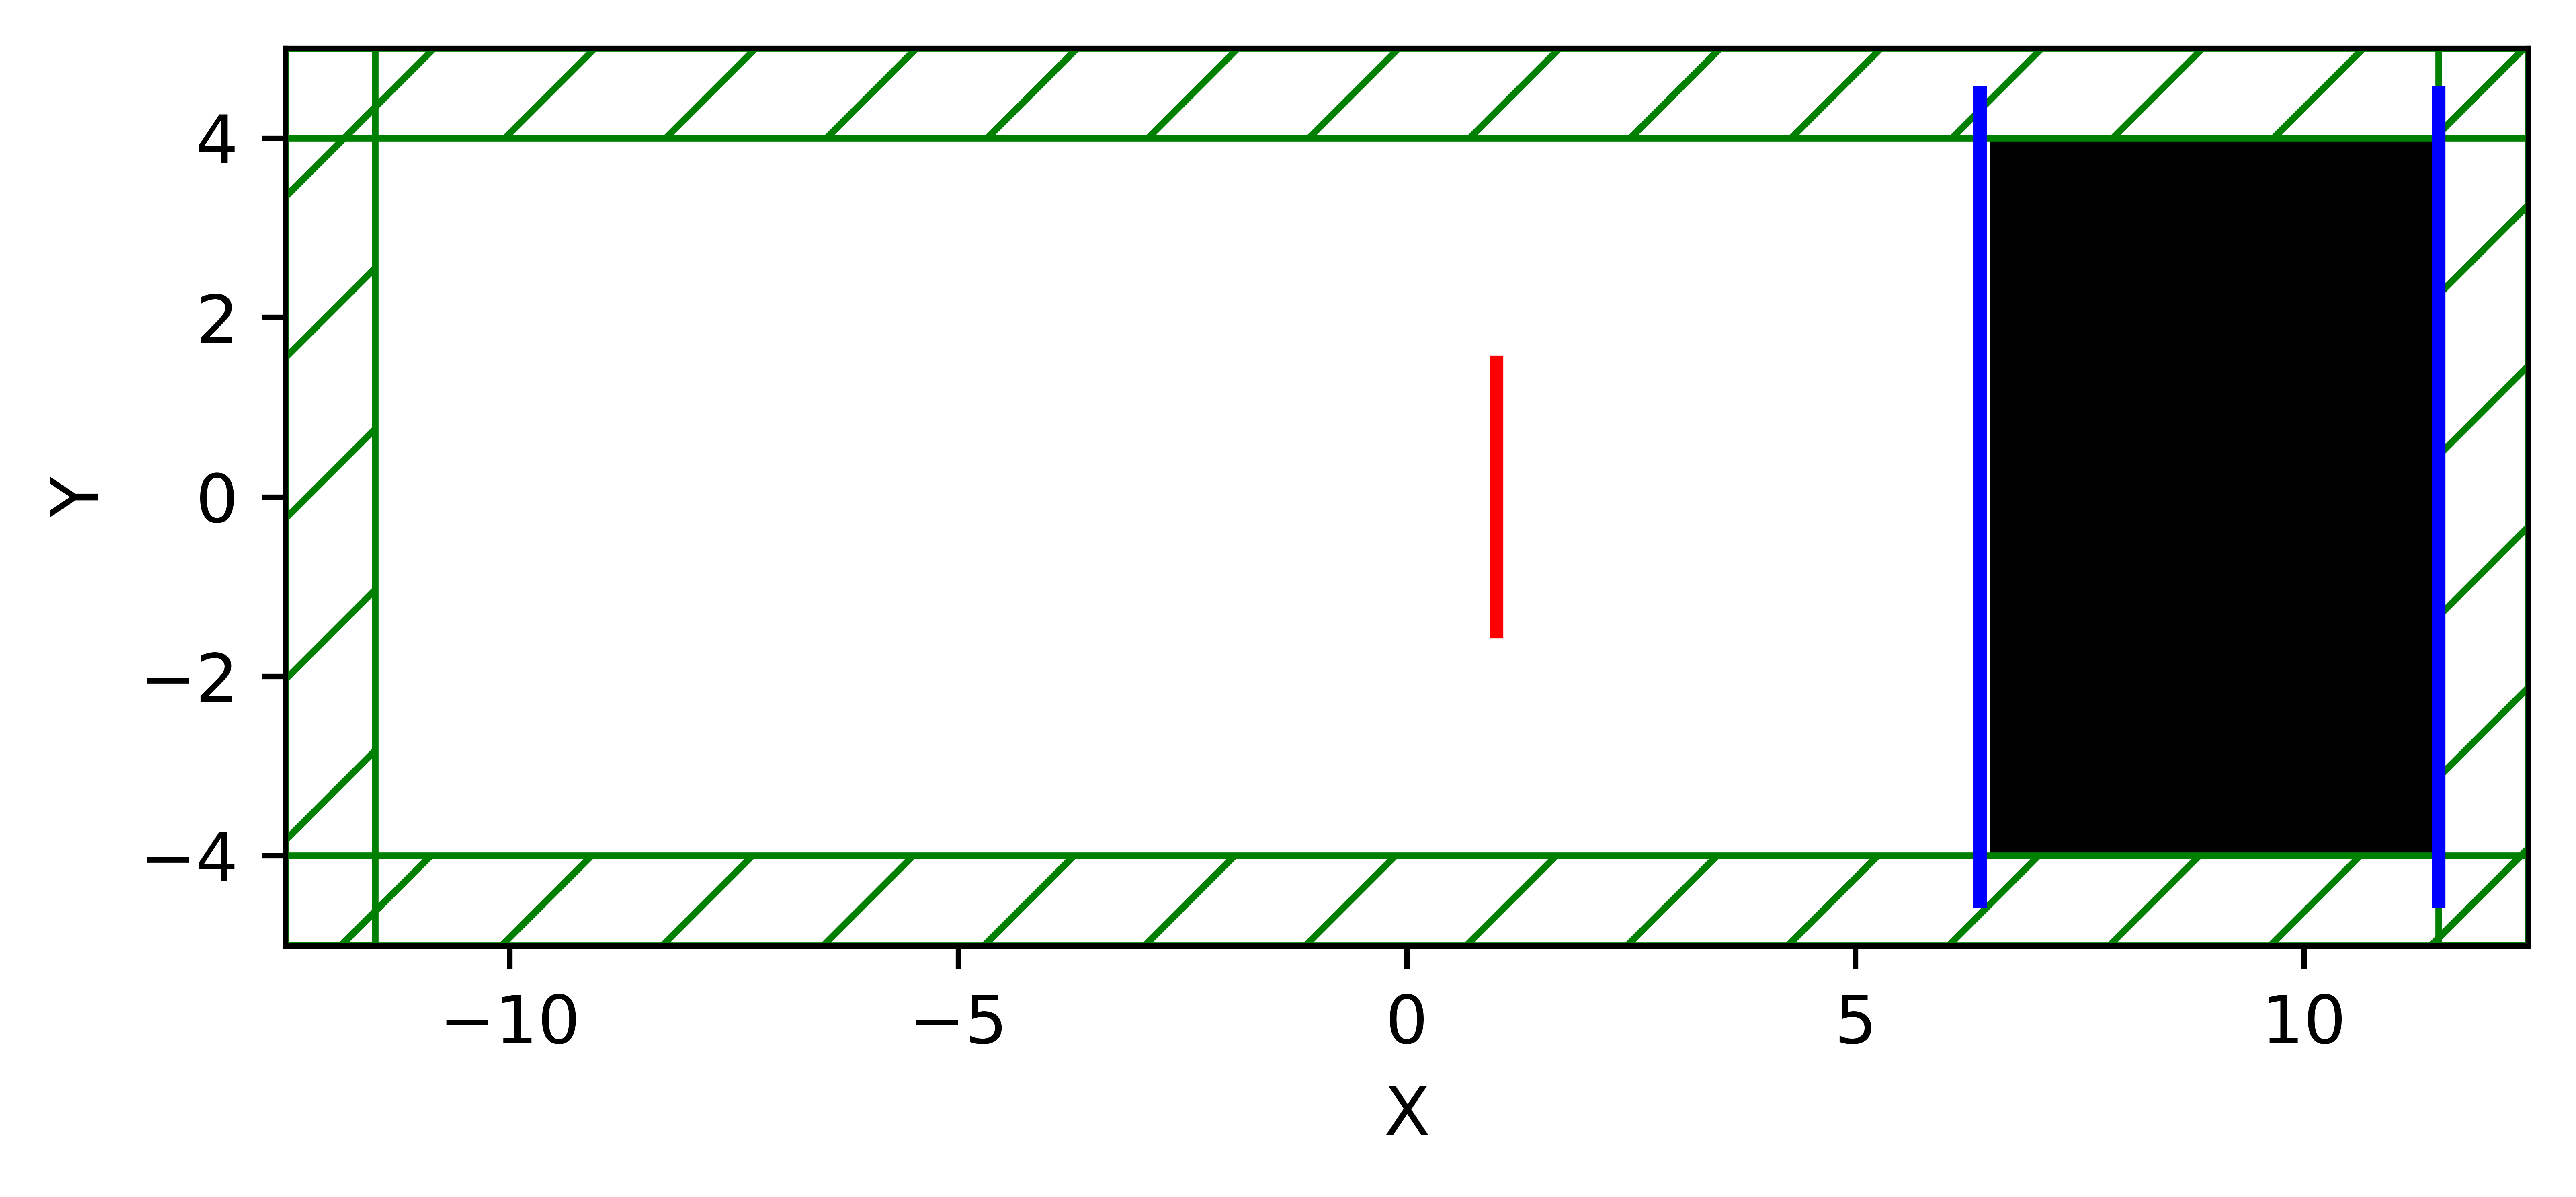

In [8]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy-2*dpml, mp.inf), 
                    center=mp.Vector3(0.5*sx-dpml-0.5*T_Si, 0),
                    material=cSi
                    ),
#            mp.Block(
#                    size=mp.Vector3(T_Arc, sy-2*dpml, mp.inf), 
#                    center=mp.Vector3(0.5*sx-dpml-0.5*T_Arc-T_Si, 0),
#                    material=SiO2)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml, 0), 
                          size=mp.Vector3(0, sy-dpml)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [9]:
pt = mp.Vector3(0.5*sx-dpml-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...
on time step 18 (time=0.045), 0.224867 s/step
on time step 42 (time=0.105), 0.17379 s/step
on time step 65 (time=0.1625), 0.174273 s/step
on time step 88 (time=0.22), 0.173914 s/step
on time step 111 (time=0.2775), 0.174115 s/step
on time step 134 (time=0.335), 0.174019 s/step
on time step 158 (time=0.395), 0.173843 s/step
on time step 181 (time=0.4525), 0.174375 s/step
on time step 205 (time=0.5125), 0.173548 s/step
on time step 228 (time=0.57), 0.173949 s/step
on time step 252 (time=0.63), 0.173713 s/step
on time step 276 (time=0.69), 0.17378 s/step
on time step 300 (time=0.75), 0.173734 s/step
on time step 323 (time=0.8075), 0.174387 s/step
on time step 346 (time=0.865), 0.174435 s/step
on time step 369 (time=0.9225), 0.173933 s/step
on time step 392 (time=0.98), 0.174297 s/step
on time step 415 (time=1.0375), 0.173953 s/step
on time step 439 (time=1.0975), 0.173721 s/step
on time step 463 (time=1.1575), 0.173556 s/step
on time step 486 (

on time step 3780 (time=9.45), 0.178641 s/step
on time step 3803 (time=9.5075), 0.178175 s/step
on time step 3826 (time=9.565), 0.177983 s/step
on time step 3849 (time=9.6225), 0.178705 s/step
on time step 3872 (time=9.68), 0.180794 s/step
on time step 3894 (time=9.735), 0.182621 s/step
on time step 3916 (time=9.79), 0.182953 s/step
on time step 3938 (time=9.845), 0.183811 s/step
on time step 3960 (time=9.9), 0.184349 s/step
on time step 3982 (time=9.955), 0.185671 s/step
on time step 4004 (time=10.01), 0.184916 s/step
on time step 4026 (time=10.065), 0.185384 s/step
on time step 4048 (time=10.12), 0.185669 s/step
on time step 4070 (time=10.175), 0.18551 s/step
on time step 4092 (time=10.23), 0.186255 s/step
on time step 4114 (time=10.285), 0.187505 s/step
on time step 4136 (time=10.34), 0.186996 s/step
on time step 4158 (time=10.395), 0.18657 s/step
on time step 4180 (time=10.45), 0.188627 s/step
on time step 4202 (time=10.505), 0.186825 s/step
on time step 4224 (time=10.56), 0.185428

on time step 7671 (time=19.1775), 0.174466 s/step
on time step 7694 (time=19.235), 0.175345 s/step
on time step 7717 (time=19.2925), 0.173991 s/step
on time step 7740 (time=19.35), 0.174262 s/step
on time step 7763 (time=19.4075), 0.174057 s/step
on time step 7786 (time=19.465), 0.175565 s/step
on time step 7809 (time=19.5225), 0.174162 s/step
on time step 7832 (time=19.58), 0.174289 s/step
on time step 7856 (time=19.64), 0.173875 s/step
on time step 7879 (time=19.6975), 0.174421 s/step
on time step 7902 (time=19.755), 0.174374 s/step
on time step 7925 (time=19.8125), 0.174133 s/step
on time step 7948 (time=19.87), 0.173965 s/step
on time step 7971 (time=19.9275), 0.174128 s/step
on time step 7994 (time=19.985), 0.174318 s/step
field decay(t = 20.0025): 1.2009819407341979e-11 / 1.2009819407341979e-11 = 1.0
on time step 8017 (time=20.0425), 0.174829 s/step
on time step 8040 (time=20.1), 0.174037 s/step
on time step 8063 (time=20.1575), 0.174225 s/step
on time step 8086 (time=20.215), 0.

on time step 11507 (time=28.7675), 0.173932 s/step
on time step 11530 (time=28.825), 0.173936 s/step
on time step 11553 (time=28.8825), 0.174203 s/step
on time step 11576 (time=28.94), 0.174151 s/step
on time step 11600 (time=29), 0.173851 s/step
on time step 11623 (time=29.0575), 0.174522 s/step
on time step 11647 (time=29.1175), 0.173848 s/step
on time step 11671 (time=29.1775), 0.173873 s/step
on time step 11694 (time=29.235), 0.17393 s/step
on time step 11717 (time=29.2925), 0.174591 s/step
on time step 11740 (time=29.35), 0.174648 s/step
on time step 11763 (time=29.4075), 0.174128 s/step
on time step 11786 (time=29.465), 0.174806 s/step
on time step 11810 (time=29.525), 0.173819 s/step
on time step 11834 (time=29.585), 0.17389 s/step
on time step 11857 (time=29.6425), 0.173929 s/step
on time step 11881 (time=29.7025), 0.173788 s/step
on time step 11905 (time=29.7625), 0.173677 s/step
on time step 11928 (time=29.82), 0.173945 s/step
on time step 11952 (time=29.88), 0.173624 s/step


on time step 15321 (time=38.3025), 0.174067 s/step
on time step 15344 (time=38.36), 0.174219 s/step
on time step 15367 (time=38.4175), 0.174283 s/step
on time step 15391 (time=38.4775), 0.17385 s/step
on time step 15415 (time=38.5375), 0.173802 s/step
on time step 15438 (time=38.595), 0.173974 s/step
on time step 15462 (time=38.655), 0.173894 s/step
on time step 15485 (time=38.7125), 0.174232 s/step
on time step 15509 (time=38.7725), 0.173777 s/step
on time step 15532 (time=38.83), 0.174409 s/step
on time step 15555 (time=38.8875), 0.175425 s/step
on time step 15579 (time=38.9475), 0.173793 s/step
on time step 15603 (time=39.0075), 0.173659 s/step
on time step 15627 (time=39.0675), 0.173778 s/step
on time step 15650 (time=39.125), 0.17496 s/step
on time step 15673 (time=39.1825), 0.175601 s/step
on time step 15696 (time=39.24), 0.174639 s/step
on time step 15719 (time=39.2975), 0.174109 s/step
on time step 15743 (time=39.3575), 0.173727 s/step
on time step 15767 (time=39.4175), 0.17360

on time step 19111 (time=47.7775), 0.174554 s/step
on time step 19134 (time=47.835), 0.174588 s/step
on time step 19157 (time=47.8925), 0.174584 s/step
on time step 19180 (time=47.95), 0.175306 s/step
on time step 19203 (time=48.0075), 0.174541 s/step
on time step 19226 (time=48.065), 0.174542 s/step
on time step 19249 (time=48.1225), 0.174358 s/step
on time step 19272 (time=48.18), 0.175069 s/step
on time step 19295 (time=48.2375), 0.174872 s/step
on time step 19318 (time=48.295), 0.174881 s/step
on time step 19341 (time=48.3525), 0.1748 s/step
on time step 19364 (time=48.41), 0.174613 s/step
on time step 19387 (time=48.4675), 0.175637 s/step
on time step 19410 (time=48.525), 0.17451 s/step
on time step 19433 (time=48.5825), 0.174677 s/step
on time step 19456 (time=48.64), 0.174495 s/step
on time step 19479 (time=48.6975), 0.174679 s/step
on time step 19502 (time=48.755), 0.174696 s/step
on time step 19525 (time=48.8125), 0.174661 s/step
on time step 19548 (time=48.87), 0.174631 s/ste

on time step 22883 (time=57.2075), 0.174584 s/step
on time step 22906 (time=57.265), 0.174549 s/step
on time step 22929 (time=57.3225), 0.175138 s/step
on time step 22952 (time=57.38), 0.174537 s/step
on time step 22975 (time=57.4375), 0.174389 s/step
on time step 22998 (time=57.495), 0.174564 s/step
on time step 23021 (time=57.5525), 0.17451 s/step
on time step 23044 (time=57.61), 0.174762 s/step
on time step 23067 (time=57.6675), 0.174591 s/step
on time step 23090 (time=57.725), 0.174529 s/step
on time step 23113 (time=57.7825), 0.174642 s/step
on time step 23136 (time=57.84), 0.17488 s/step
on time step 23159 (time=57.8975), 0.174598 s/step
on time step 23182 (time=57.955), 0.174653 s/step
on time step 23205 (time=58.0125), 0.17617 s/step
on time step 23228 (time=58.07), 0.174534 s/step
on time step 23251 (time=58.1275), 0.174662 s/step
on time step 23274 (time=58.185), 0.174543 s/step
on time step 23297 (time=58.2425), 0.179224 s/step
on time step 23320 (time=58.3), 0.177521 s/step

on time step 26609 (time=66.5225), 0.174699 s/step
on time step 26632 (time=66.58), 0.174696 s/step
on time step 26655 (time=66.6375), 0.174585 s/step
on time step 26678 (time=66.695), 0.174426 s/step
on time step 26701 (time=66.7525), 0.174543 s/step
on time step 26724 (time=66.81), 0.174596 s/step
on time step 26747 (time=66.8675), 0.174502 s/step
on time step 26770 (time=66.925), 0.174771 s/step
on time step 26793 (time=66.9825), 0.174566 s/step
on time step 26816 (time=67.04), 0.174967 s/step
on time step 26839 (time=67.0975), 0.175229 s/step
on time step 26862 (time=67.155), 0.175392 s/step
on time step 26885 (time=67.2125), 0.17534 s/step
on time step 26908 (time=67.27), 0.17524 s/step
on time step 26931 (time=67.3275), 0.175174 s/step
on time step 26954 (time=67.385), 0.175577 s/step
on time step 26977 (time=67.4425), 0.175741 s/step
on time step 27000 (time=67.5), 0.175025 s/step
on time step 27023 (time=67.5575), 0.174928 s/step
on time step 27046 (time=67.615), 0.175396 s/ste

on time step 30384 (time=75.96), 0.174442 s/step
on time step 30407 (time=76.0175), 0.174024 s/step
on time step 30430 (time=76.075), 0.174034 s/step
on time step 30453 (time=76.1325), 0.174051 s/step
on time step 30476 (time=76.19), 0.174066 s/step
on time step 30499 (time=76.2475), 0.174354 s/step
on time step 30522 (time=76.305), 0.174523 s/step
on time step 30546 (time=76.365), 0.173656 s/step
on time step 30569 (time=76.4225), 0.174023 s/step
on time step 30592 (time=76.48), 0.174399 s/step
on time step 30615 (time=76.5375), 0.174518 s/step
on time step 30638 (time=76.595), 0.174336 s/step
on time step 30661 (time=76.6525), 0.174387 s/step
on time step 30684 (time=76.71), 0.174559 s/step
on time step 30707 (time=76.7675), 0.174421 s/step
on time step 30730 (time=76.825), 0.174389 s/step
on time step 30753 (time=76.8825), 0.174665 s/step
on time step 30776 (time=76.94), 0.176749 s/step
on time step 30799 (time=76.9975), 0.17459 s/step
on time step 30822 (time=77.055), 0.174789 s/st

on time step 34116 (time=85.29), 0.174638 s/step
on time step 34139 (time=85.3475), 0.174159 s/step
on time step 34162 (time=85.405), 0.174077 s/step
on time step 34185 (time=85.4625), 0.174263 s/step
on time step 34208 (time=85.52), 0.174105 s/step
on time step 34231 (time=85.5775), 0.174121 s/step
on time step 34254 (time=85.635), 0.175072 s/step
on time step 34277 (time=85.6925), 0.174566 s/step
on time step 34300 (time=85.75), 0.174395 s/step
on time step 34323 (time=85.8075), 0.174065 s/step
on time step 34346 (time=85.865), 0.174551 s/step
on time step 34369 (time=85.9225), 0.174327 s/step
on time step 34392 (time=85.98), 0.174528 s/step
on time step 34415 (time=86.0375), 0.174512 s/step
on time step 34438 (time=86.095), 0.174212 s/step
on time step 34461 (time=86.1525), 0.174165 s/step
on time step 34484 (time=86.21), 0.174476 s/step
on time step 34507 (time=86.2675), 0.174353 s/step
on time step 34530 (time=86.325), 0.174167 s/step
on time step 34553 (time=86.3825), 0.174161 s/

on time step 37888 (time=94.72), 0.174537 s/step
on time step 37912 (time=94.78), 0.173856 s/step
on time step 37935 (time=94.8375), 0.174163 s/step
on time step 37959 (time=94.8975), 0.173824 s/step
on time step 37983 (time=94.9575), 0.173799 s/step
on time step 38006 (time=95.015), 0.17417 s/step
on time step 38029 (time=95.0725), 0.174018 s/step
on time step 38053 (time=95.1325), 0.173698 s/step
on time step 38076 (time=95.19), 0.174116 s/step
on time step 38099 (time=95.2475), 0.173954 s/step
on time step 38122 (time=95.305), 0.174437 s/step
on time step 38145 (time=95.3625), 0.173967 s/step
on time step 38168 (time=95.42), 0.174833 s/step
on time step 38191 (time=95.4775), 0.173969 s/step
on time step 38214 (time=95.535), 0.174687 s/step
on time step 38237 (time=95.5925), 0.174469 s/step
on time step 38260 (time=95.65), 0.176203 s/step
on time step 38283 (time=95.7075), 0.174878 s/step
on time step 38307 (time=95.7675), 0.173715 s/step
on time step 38330 (time=95.825), 0.174016 s/

on time step 41627 (time=104.067), 0.173961 s/step
on time step 41650 (time=104.125), 0.17556 s/step
on time step 41673 (time=104.183), 0.174144 s/step
on time step 41696 (time=104.24), 0.174174 s/step
on time step 41719 (time=104.297), 0.174508 s/step
on time step 41742 (time=104.355), 0.17501 s/step
on time step 41765 (time=104.413), 0.174036 s/step
on time step 41788 (time=104.47), 0.174393 s/step
on time step 41811 (time=104.528), 0.174352 s/step
on time step 41834 (time=104.585), 0.173981 s/step
on time step 41858 (time=104.645), 0.173679 s/step
on time step 41881 (time=104.703), 0.174058 s/step
on time step 41904 (time=104.76), 0.174573 s/step
on time step 41927 (time=104.817), 0.174186 s/step
on time step 41950 (time=104.875), 0.174613 s/step
on time step 41973 (time=104.933), 0.179867 s/step
on time step 41996 (time=104.99), 0.178038 s/step
on time step 42019 (time=105.047), 0.174403 s/step
on time step 42042 (time=105.105), 0.174043 s/step
on time step 42065 (time=105.163), 0.

on time step 45391 (time=113.478), 0.174452 s/step
on time step 45414 (time=113.535), 0.174631 s/step
on time step 45437 (time=113.593), 0.174427 s/step
on time step 45460 (time=113.65), 0.174411 s/step
on time step 45483 (time=113.707), 0.17445 s/step
on time step 45506 (time=113.765), 0.174621 s/step
on time step 45529 (time=113.823), 0.174019 s/step
on time step 45552 (time=113.88), 0.174304 s/step
on time step 45575 (time=113.938), 0.17423 s/step
on time step 45598 (time=113.995), 0.174472 s/step
on time step 45621 (time=114.053), 0.174495 s/step
on time step 45644 (time=114.11), 0.174576 s/step
on time step 45667 (time=114.168), 0.174491 s/step
on time step 45690 (time=114.225), 0.174616 s/step
on time step 45713 (time=114.282), 0.174486 s/step
on time step 45736 (time=114.34), 0.17407 s/step
on time step 45759 (time=114.398), 0.174228 s/step
on time step 45782 (time=114.455), 0.174682 s/step
on time step 45805 (time=114.513), 0.174634 s/step
on time step 45828 (time=114.57), 0.17

In [10]:
no_ARC_refl_data

FluxData(E=array([-2.64229304e-07+7.42521484e-08j, -2.73354611e-07+5.06948065e-08j,
       -2.80360045e-07+2.61137983e-08j, ...,
        2.54734539e-08-1.57041808e-08j,  2.61358221e-08-1.29415130e-08j,
        2.65252959e-08-1.02016616e-08j]), H=array([-8.83042425e-05+3.68281086e-05j, -9.25376908e-05+2.92175661e-05j,
       -9.61139746e-05+2.11522856e-05j, ...,
        8.45778133e-05-2.19940016e-05j,  8.41279503e-05-1.38349635e-05j,
        8.29557352e-05-5.95393059e-06j]))

In [11]:
no_ARC_refl_flux

[1.349248002019603e-06,
 1.4077801399825004e-06,
 1.4687262937222076e-06,
 1.5321804479450692e-06,
 1.598240008872683e-06,
 1.667005919063469e-06,
 1.7385827756665093e-06,
 1.813078952197724e-06,
 1.890606723935059e-06,
 1.97128239703369e-06,
 2.055226441468244e-06,
 2.142563627912761e-06,
 2.2334231686718706e-06,
 2.327938862779309e-06,
 2.4262492453799662e-06,
 2.528497741509421e-06,
 2.6348328243856992e-06,
 2.7454081783225284e-06,
 2.8603828663722228e-06,
 2.9799215027995728e-06,
 3.1041944304923343e-06,
 3.233377903404517e-06,
 3.367654274134014e-06,
 3.507212186735545e-06,
 3.6522467748738894e-06,
 3.8029598654282644e-06,
 3.9595601876642905e-06,
 4.1222635881012085e-06,
 4.291293251207304e-06,
 4.466879926071878e-06,
 4.649262159203625e-06,
 4.838686533620693e-06,
 5.035407914397616e-06,
 5.239689700844864e-06,
 5.4518040854882615e-06,
 5.672032320025496e-06,
 5.900664988423655e-06,
 6.138002287319801e-06,
 6.384354313876447e-06,
 6.640041361237216e-06,
 6.905394221712864e-06,
 

In [12]:
no_ARC_tran_flux

[1.2690634281086461e-06,
 1.3242205508470575e-06,
 1.3816609929030826e-06,
 1.441474160814793e-06,
 1.5037527387275289e-06,
 1.5685927986553797e-06,
 1.6360939141580236e-06,
 1.7063592775640156e-06,
 1.7794958208702452e-06,
 1.8556143404433987e-06,
 1.934829625644365e-06,
 2.0172605914880668e-06,
 2.103030415442047e-06,
 2.1922666784571625e-06,
 2.2851015103137776e-06,
 2.3816717393554575e-06,
 2.482119046678045e-06,
 2.5865901248284403e-06,
 2.695236841075481e-06,
 2.8082164052990113e-06,
 2.925691542563016e-06,
 3.0478306704333606e-06,
 3.1748080811153236e-06,
 3.3068041284986678e-06,
 3.4440054202142093e-06,
 3.586605014819992e-06,
 3.734802624257488e-06,
 3.888804821733868e-06,
 4.048825255201687e-06,
 4.2150848666278975e-06,
 4.387812117248093e-06,
 4.5672432190165276e-06,
 4.75362237246199e-06,
 4.947202011163792e-06,
 5.148243053046387e-06,
 5.357015158694993e-06,
 5.57379699686927e-06,
 5.7988765173814595e-06,
 6.032551231482949e-06,
 6.275128499886795e-06,
 6.526925828533725e-

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
#import pandas as pd
#df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
#df.to_csv('with_ARC.csv')

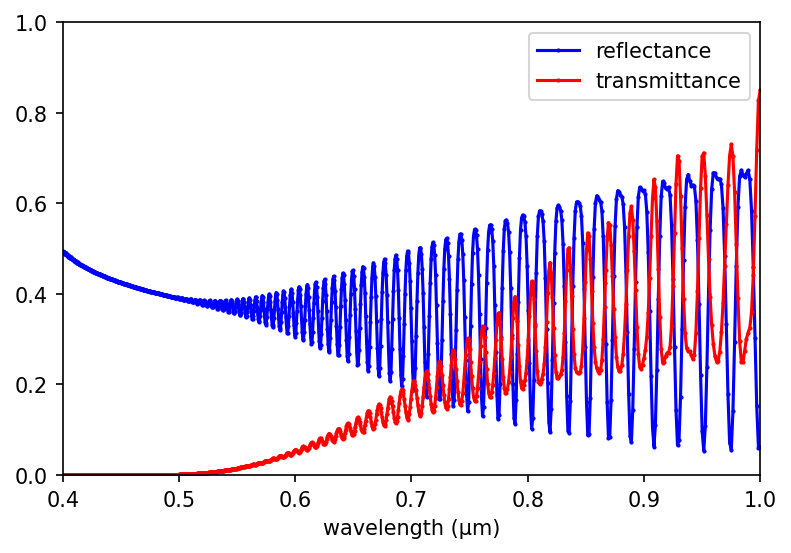

In [15]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance',markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()